# Real valued Hamming codes over AWGN channel

In [4]:
# Imports
import py_itpp as pyp
from matplotlib import pyplot as plt

# BER for uncoded over AWGN

In [5]:
def bit_error_ratio_uncoded_awgn(snr_db):
    '''Generate random bits'''
    nrof_bits = 3 * 100000
    source_bits = pyp.random.randb(nrof_bits)
    
    '''Modulate the bits'''
    modulator_ = pyp.modulator.modulator_1d()
    constellation = pyp.vec.vec('-1, 1')
    symbols = pyp.vec.ivec('0, 1')
    modulator_.set(constellation, symbols)
    tx_signal = modulator_.modulate_bits(source_bits)
    
    '''Add the effect of channel to the signal'''
    noise_variance = 1.0 / (pow(10, 0.1 * snr_db))
    noise = pyp.random.randn(tx_signal.length())
    noise *= pyp.elem_math.sqrt(noise_variance)
    rx_signal = tx_signal + noise
    
    '''Demodulate the signal'''
    demodulated_bits = modulator_.demodulate_bits(rx_signal)
    
    '''Calculate the bit error ratio'''
    return pyp.error_counters.BERC.count_errors(source_bits, demodulated_bits, 0, 0, 0) / nrof_bits

# BER for Hamming (7, 4) coded over AWGN

In [6]:
def bit_error_ratio_hamming_awgn(snr_db):
    '''Hamming encoder and decoder instance'''
    k = 3 # (7,4) Hamming code
    hamm = pyp.hammcode.hamming_code(k)
    
    '''Generate random bits'''
    nrof_bits = k * 100000
    source_bits = pyp.random.randb(nrof_bits)
    
    '''Encode the bits'''
    encoded_bits = hamm.encode(source_bits)
    
    '''Modulate the bits'''
    modulator_ = pyp.modulator.modulator_1d()
    constellation = pyp.vec.vec('-1, 1')
    symbols = pyp.vec.ivec('0, 1')
    modulator_.set(constellation, symbols)
    tx_signal = modulator_.modulate_bits(encoded_bits)
    
    '''Add the effect of channel to the signal'''
    noise_variance = 1.0 / (pow(10, 0.1 * snr_db))
    noise = pyp.random.randn(tx_signal.length())
    noise *= pyp.elem_math.sqrt(noise_variance)
    rx_signal = tx_signal + noise
    
    '''Demodulate the signal'''
    demodulated_bits = modulator_.demodulate_bits(rx_signal)
    
    '''Decode the received bits'''
    decoded_bits = hamm.decode(demodulated_bits) 
    
    '''Calculate the bit error ratio'''
    return pyp.error_counters.BERC.count_errors(source_bits, decoded_bits, 0, 0, 0) / nrof_bits

# Run simulation

In [7]:
'''SNR range'''
snrs_db = range(-10, 10) 

print('BER for uncoded bits over AWGN channel')
ber_unc = [bit_error_ratio_uncoded_awgn(snr) for snr in snrs_db]

print('BER for Hamming (7, 4) coded  bits over AWGN channel')
ber = [bit_error_ratio_hamming_awgn(snr) for snr in snrs_db]

BER for uncoded bits over AWGN channel
BER for Hamming (7, 4) coded  bits over AWGN channel


# Plot results

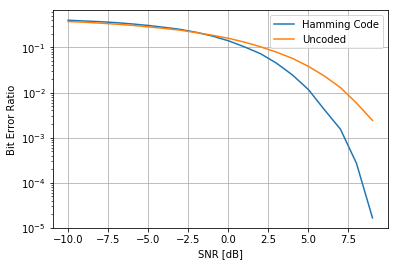

In [8]:
plt.figure()
plt.grid(True)
plt.semilogy(snrs_db, ber)
plt.semilogy(snrs_db, ber_unc)
plt.xlabel('SNR [dB]')
plt.ylabel('Bit Error Ratio')
plt.legend(['Hamming Code', 'Uncoded'])
plt.show()